# Aula 1

## Vídeo 1.2 - Carregando textos

In [1]:
import pandas as pd

In [2]:
url = "./dados/train.csv"

In [3]:
df = pd.read_csv(url, header=None, names=['ClassIndex','Título','Descrição'])
df.head()

,ClassIndex,Título,Descrição
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


https://github.com/allanspadini/curso-tensorflow-proxima-palavra/blob/main/dados/classes.txt

In [4]:
df['Texto'] = df['Título'] + ' ' + df['Descrição']

In [5]:
df['Texto']

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: Texto, Length: 120000, dtype: object

In [6]:
df['ClassIndex'] = df['ClassIndex'] - 1

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_treino, X_teste, y_treino,y_teste = train_test_split(df['Texto'].values, df['ClassIndex'].values, test_size=0.2, random_state=4266)

## Vídeo 1.3 - Codificando o texto

In [9]:
import tensorflow as tf

2024-12-02 17:56:03.648166: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 17:56:03.670355: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 17:56:03.670375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 17:56:03.670868: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 17:56:03.674671: I tensorflow/core/platform/cpu_feature_guar

In [10]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)


2024-12-02 17:56:04.729222: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 17:56:04.762725: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 17:56:04.770853: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [11]:
encoder.adapt(X_treino)

In [12]:
encoder.get_vocabulary()[::10]

['',
 '39s',
 'it',
 'was',
 'more',
 'company',
 'than',
 'microsoft',
 'prices',
 'people',
 'next',
 'sales',
 'state',
 'most',
 'profit',
 'lead',
 'online',
 '39t',
 'red',
 'during',
 'say',
 'between',
 'country',
 'mobile',
 'quarter',
 'being',
 'dollar',
 'stock',
 'sox',
 'olympic',
 'users',
 'price',
 'how',
 'peace',
 'six',
 'key',
 'i',
 'should',
 'financial',
 'leaders',
 'house',
 'sun',
 'used',
 'seven',
 'israel',
 'future',
 'trial',
 'half',
 'customers',
 'defense',
 'arafat',
 'northern',
 'due',
 'men',
 'hopes',
 'using',
 'scored',
 'university',
 'texas',
 'mark',
 'we',
 'accused',
 'profits',
 '18',
 'possible',
 'call',
 'rally',
 'teams',
 'division',
 '7',
 'takeover',
 'production',
 'outlook',
 'began',
 'helped',
 'opening',
 'sept',
 'spain',
 'hours',
 'starting',
 'nine',
 'pressure',
 'executives',
 'personal',
 'once',
 'italian',
 'push',
 'continued',
 'rising',
 'kill',
 'powerful',
 'side',
 'designed',
 'groups',
 'mission',
 'najaf',
 '

In [13]:
Exemplo = "Today's NFL games PITTSBURGH at NY GIANTS"

In [14]:
encoder(Exemplo)

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([  1, 713, 202,   1,  14,   1, 516])>

## Vídeo 1.4 - Criando um modelo

In [15]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')

])

In [16]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

https://projector.tensorflow.org/

In [17]:
X_teste[0]

'Border Patrol Training Moves Near Mexico (AP) AP - Incoming Border Patrol agents will train closer to the U.S.-Mexican border when the federal government relocates their academy to Artesia, N.M., Customs and Border Protection announced Thursday.'

In [18]:
y_teste[0]

0

In [19]:
X_teste.shape

(24000,)

In [20]:
modelo.predict(X_teste[:1])

1/1 [==============================] - 0s 295ms/step


array([[0.24893096, 0.24954651, 0.25023094, 0.25129154]], dtype=float32)

In [21]:
modelo.predict(X_teste[:1]).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([3])

# Aula 2 - Classificando o texto

## Vídeo 2.1: Treinando com camadas densas

In [15]:
epocas = 10

In [16]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

NameError: name 'modelo' is not defined

In [17]:
import matplotlib.pyplot as plt

In [18]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

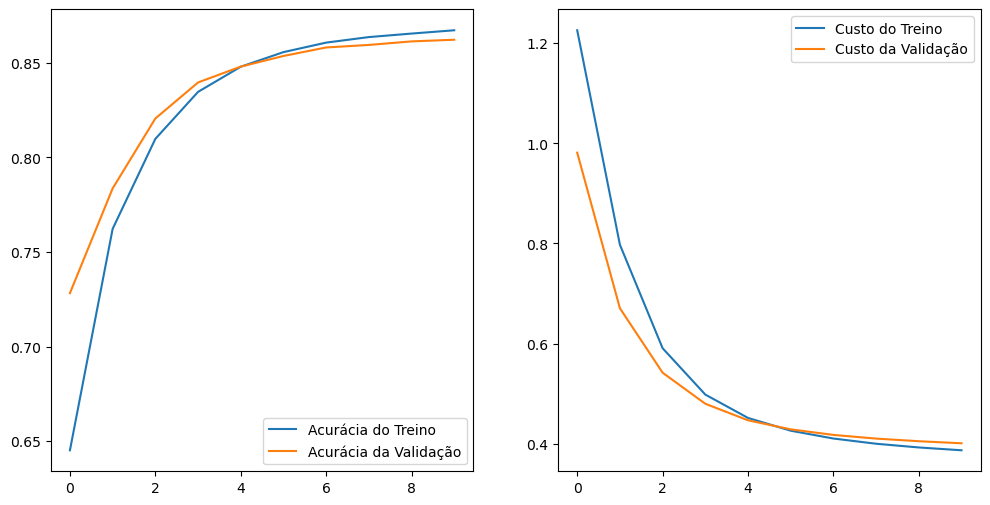

In [26]:
plota_resultados(history,epocas)

## Vídeo 2.2: Adicionando camadas convolucionais

In [19]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True
    ),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(128, kernel_size=4, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [20]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

Epoch 1/10


2024-12-02 17:56:43.085975: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-12-02 17:56:43.853126: I external/local_xla/xla/service/service.cc:168] XLA service 0x727a0158bdc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-02 17:56:43.853146: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-12-02 17:56:43.856181: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733173003.902565   17668 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3000/3000 [==============================] - 48s 15ms/step - loss: 0.9593 - accuracy: 0.5467 - val_loss: 0.5784 - val_accuracy: 0.7912
Epoch 2/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5243 - accuracy: 0.8184 - val_loss: 0.4639 - val_accuracy: 0.8431
Epoch 3/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4658 - accuracy: 0.8432 - val_loss: 0.4435 - val_accuracy: 0.8490
Epoch 4/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4445 - accuracy: 0.8503 - val_loss: 0.4281 - val_accuracy: 0.8543
Epoch 5/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4299 - accuracy: 0.8551 - val_loss: 0.4181 - val_accuracy: 0.8561
Epoch 6/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4182 - accuracy: 0.8575 - val_loss: 0.4083 - val_accuracy: 0.8589
Epoch 7/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4068 - accuracy: 0.8612 - val_loss: 0.3990 - val_accuracy: 0.8612
E

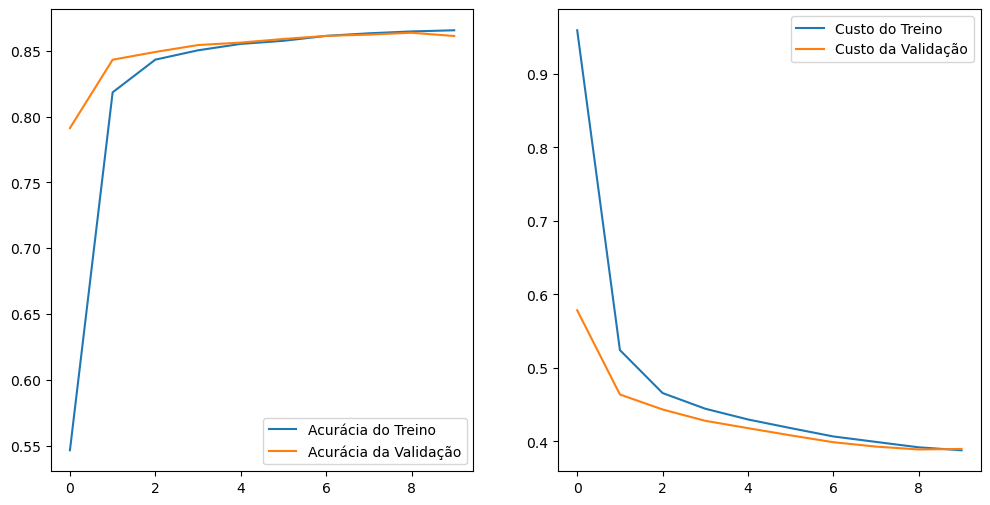

In [22]:
plota_resultados(history,epocas)

## Vídeo 2.3 - Adicionando camadas LSTM

In [23]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # Camada BiLSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [24]:
# Compilar o modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
epocas = 20

In [26]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

Epoch 1/20


2024-12-02 18:10:01.826106: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	for Tuple type infernce function 0
	while inferring type of node 'cond_38/output/_24'


3000/3000 [==============================] - 43s 12ms/step - loss: 0.6710 - accuracy: 0.7406 - val_loss: 0.4367 - val_accuracy: 0.8459
Epoch 2/20
3000/3000 [==============================] - 30s 10ms/step - loss: 0.4386 - accuracy: 0.8531 - val_loss: 0.3957 - val_accuracy: 0.8635
Epoch 3/20
3000/3000 [==============================] - 30s 10ms/step - loss: 0.4074 - accuracy: 0.8628 - val_loss: 0.3789 - val_accuracy: 0.8674
Epoch 4/20
3000/3000 [==============================] - 30s 10ms/step - loss: 0.3896 - accuracy: 0.8683 - val_loss: 0.3711 - val_accuracy: 0.8708
Epoch 5/20
3000/3000 [==============================] - 30s 10ms/step - loss: 0.3805 - accuracy: 0.8701 - val_loss: 0.3742 - val_accuracy: 0.8684
Epoch 6/20
3000/3000 [==============================] - 30s 10ms/step - loss: 0.3743 - accuracy: 0.8718 - val_loss: 0.3679 - val_accuracy: 0.8720
Epoch 7/20
3000/3000 [==============================] - 30s 10ms/step - loss: 0.3668 - accuracy: 0.8730 - val_loss: 0.3639 - val_accura

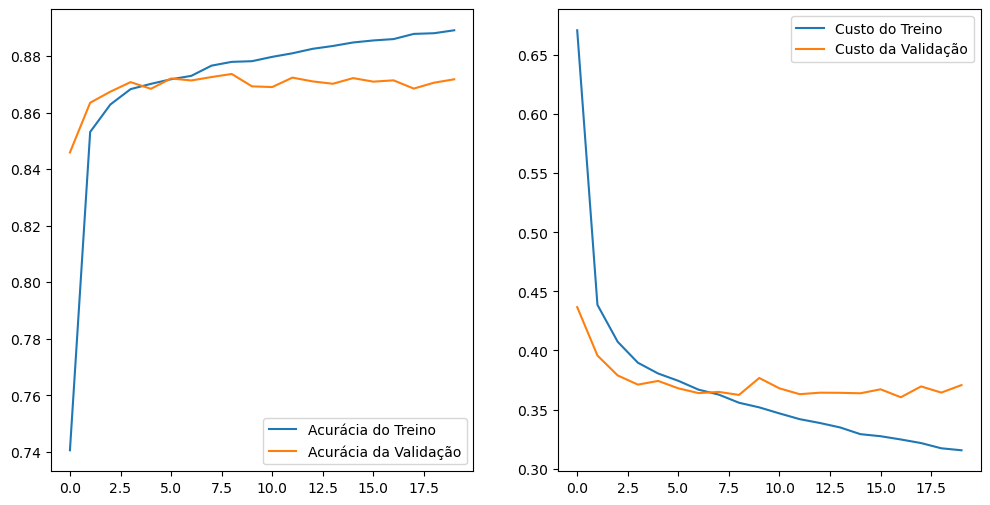

In [27]:
plota_resultados(history,epocas)

In [28]:
modelo.predict(X_teste[1:2])

1/1 [==============================] - 2s 2s/step


array([[0.98849005, 0.00128258, 0.00831973, 0.00190776]], dtype=float32)

In [29]:
modelo.predict(X_teste[1:2]).argmax(axis=1)

1/1 [==============================] - 0s 18ms/step


array([0])

In [30]:
y_teste[1]

0